<a href="https://colab.research.google.com/github/abatista346/APIVitivinicultura/blob/master/Tech_Challenge_FIAP_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊Análise de Dados Descritiva Tech Challenge MLE FIAP**

# Importando as bibliotecas principais para a Análise

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para API e seus respectivos EndPoints

In [ ]:
# Configurações
BASE_URL = "https://api-embrapa-vitivinicultura-181232612764.southamerica-east1.run.app"

# Insira suas credenciais
USERNAME = "fiap"  # Substitua pelo seu nome de usuário
PASSWORD = "Fiap2025"  # Substitua pela sua senha

# Listando Endpoints de Consulta
ENDPOINTS_COMERCIALIZACOES = [
    "comercializacoes?ano=2019",
    "comercializacoes?ano=2020",
    "comercializacoes?ano=2021",
    "comercializacoes?ano=2022",
    "comercializacoes?ano=2023"
]

ENDPOINTS_PRODUCOES = [
    "producoes?ano=2019",
    "producoes?ano=2020",
    "producoes?ano=2021",
    "producoes?ano=2022",
    "producoes?ano=2023"
]

Criando Funções que irão buscar o Token de autenticação, assim como acessar os EndPoints, com base em usuário e senha

In [ ]:
# Função para obter um novo token JWT
def login(username, password):
    login_url = f"{BASE_URL}/login"  # endpoint de login seja /login
    credentials = {
        "username": username,
        "password": password
    }
    response = requests.post(login_url, json=credentials)
    if response.status_code == 200:
        print("✅ Login bem-sucedido!")
        return response.json().get("access_token")  # Assumindo que o token seja retornado em "access_token"
    else:
        print(f"❌ Erro no login: {response.status_code}")
        return None

  # Função para obter os dados dos endpoints
def get_data(endpoint):
    url = f"{BASE_URL}/{endpoint}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        print(f"✅ Sucesso: /{endpoint}")
        return pd.DataFrame(response.json())
    else:
        print(f"❌ Erro {response.status_code} em /{endpoint}")
        return pd.DataFrame()

Realizando Login com base nos usuário e senha informado



In [ ]:
# Obter o novo token
new_token = login(USERNAME, PASSWORD)

# Cabeçalho com o token JWT
headers = {
    "Authorization": f"Bearer {new_token}"
}

# Coleta de Dados

In [ ]:
# Coleta dos dados

# Função para Endpoint de Comercializações
dfs_comercializacoes = {}
for ep in ENDPOINTS_COMERCIALIZACOES:
    df_comercializacoes = get_data(ep)
    if not df_comercializacoes.empty:
        dfs_comercializacoes[ep] = df_comercializacoes
print('-' * 40)
# Função para Endpoint de Produções
dfs_producoes = {}
for ep in ENDPOINTS_PRODUCOES:
    df_producoes = get_data(ep)
    if not df_producoes.empty:
        dfs_producoes[ep] = df_producoes

✅ Sucesso: /comercializacoes?ano=2019
✅ Sucesso: /comercializacoes?ano=2020
✅ Sucesso: /comercializacoes?ano=2021
✅ Sucesso: /comercializacoes?ano=2022
✅ Sucesso: /comercializacoes?ano=2023
----------------------------------------
✅ Sucesso: /producoes?ano=2019
✅ Sucesso: /producoes?ano=2020
✅ Sucesso: /producoes?ano=2021
✅ Sucesso: /producoes?ano=2022
✅ Sucesso: /producoes?ano=2023


Unificado todo o período dos DataSets Selecionado

In [ ]:
# Unificado data sets

# Data Set Comercializações
df_comer = pd.concat(dfs_comercializacoes.values(), ignore_index=True)

# Data Set Produções
df_prod = pd.concat(dfs_producoes.values(), ignore_index=True)


# Avaliando Dados, identificando informações disponíveis e Criando gráficos de Evolução Temporal

In [ ]:
# Primeiras 5 linhas do DataSet Comercialização
df_comer.head()

,ano,produto,quantidade
0,2019,VINHO DE MESA,180446489
1,2019,Tinto,158519218
2,2019,Rosado,1265435
3,2019,Branco,20661836
4,2019,VINHO FINO DE MESA,15684588


In [ ]:
print("Colunas:", df_comer.columns.tolist())

Colunas: ['ano', 'produto', 'quantidade']


In [ ]:
# Tido de dados  do DataSet Comercialização
print(df_comer.describe(include='all'))

                ano produto    quantidade
count    315.000000     315  3.150000e+02
unique          NaN      57           NaN
top             NaN   Tinto           NaN
freq            NaN      15           NaN
mean    2021.000000     NaN  2.139507e+07
std        1.416464     NaN  6.855138e+07
min     2019.000000     NaN  0.000000e+00
25%     2020.000000     NaN  3.159500e+03
50%     2021.000000     NaN  3.389260e+05
75%     2022.000000     NaN  5.893218e+06
max     2023.000000     NaN  4.731930e+08


In [ ]:
# Primeiras 5 linhas do DataSet Produção
df_prod.head()

,ano,produto,quantidade
0,2019,VINHO DE MESA,144629737
1,2019,Tinto,121045115
2,2019,Branco,22032828
3,2019,Rosado,1551794
4,2019,VINHO FINO DE MESA (VINIFERA),37615422


In [ ]:
# Tido de dados  do DataSet Produção
print(df_prod.describe(include='all'))

                ano produto    quantidade
count    260.000000     260  2.600000e+02
unique          NaN      49           NaN
top             NaN   Tinto           NaN
freq            NaN      10           NaN
mean    2021.000000     NaN  2.438581e+07
std        1.416941     NaN  6.920629e+07
min     2019.000000     NaN  0.000000e+00
25%     2020.000000     NaN  0.000000e+00
50%     2021.000000     NaN  3.245900e+04
75%     2022.000000     NaN  4.413604e+06
max     2023.000000     NaN  4.873388e+08


Gerando visualização de Análise de Evolução Temporal

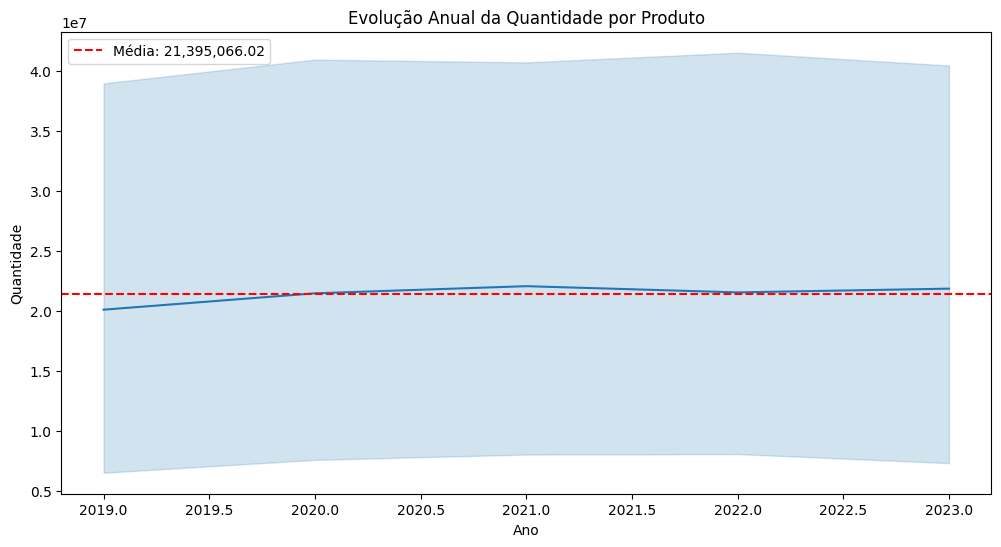

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comer, x='ano', y='quantidade')

# Calcular e adicionar linha média
media_quantidade = df_comer['quantidade'].mean()
plt.axhline(media_quantidade, color='red', linestyle='--', label=f'Média: {media_quantidade:,.2f}')
plt.legend()

plt.title('Evolução Anual da Quantidade por Produto')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()

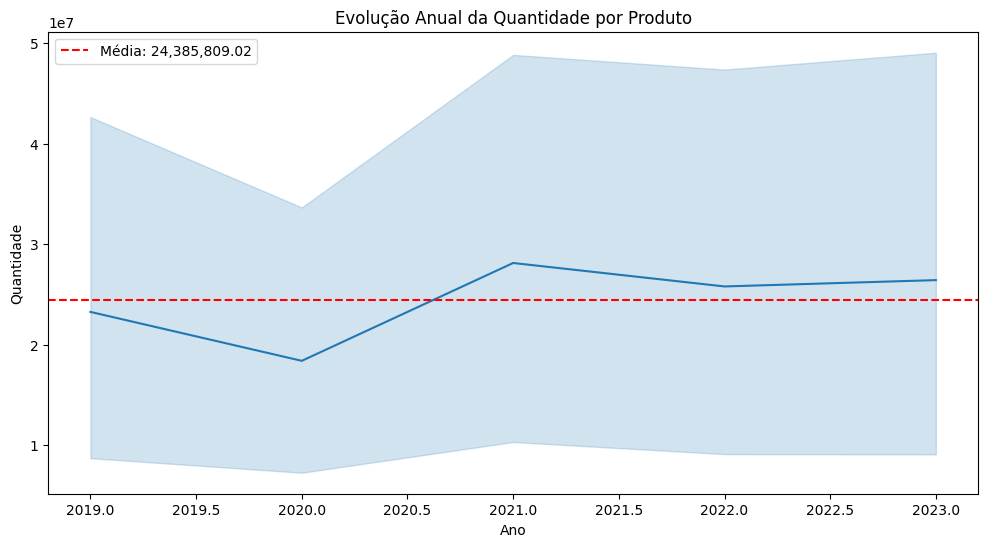

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_prod, x='ano', y='quantidade')

# Calcular e adicionar linha média
media_quantidade = df_prod['quantidade'].mean()
plt.axhline(media_quantidade, color='red', linestyle='--', label=f'Média: {media_quantidade:,.2f}')
plt.legend()

plt.title('Evolução Anual da Quantidade por Produto')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()